In [7]:
# ----------------------------------------------------------
# Proyecto: Análisis espectral con Fourier 2D
# Semana 1 — Energía total, Eb, Ea (integrales dobles discretas)
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import data, color, img_as_float
import os

# Asegurar rutas
os.makedirs("../reports", exist_ok=True)

# Configuración de visualización
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["image.cmap"] = "gray"


Tamaño de la imagen: 512 x 512


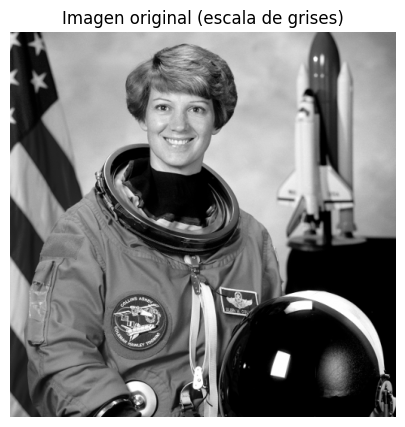

In [8]:
# Puedes cambiar la imagen según el dataset
img = img_as_float(color.rgb2gray(data.astronaut()))
M, N = img.shape

print(f"Tamaño de la imagen: {M} x {N}")
plt.imshow(img)
plt.title("Imagen original (escala de grises)")
plt.axis("off")
plt.show()


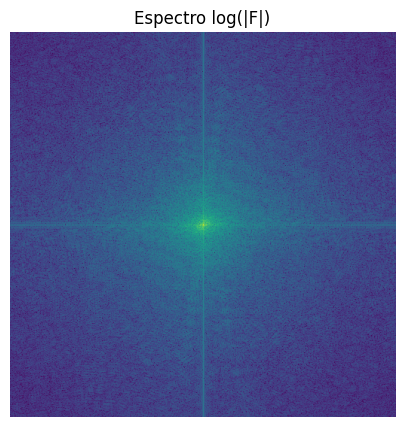

In [9]:
# Transformada de Fourier 2D y centrado del espectro
F = fftshift(fft2(img))
S = np.abs(F)
S_log = np.log1p(S)

# Visualización del espectro
plt.imshow(S_log, cmap="viridis")
plt.title("Espectro log(|F|)")
plt.axis("off")
plt.show()

# Guardar figura
plt.imsave("../reports/espectro_log.png", S_log, cmap="viridis")


In [10]:
# Energía en el dominio espacial (integral doble discreta)
E_space = np.sum(img**2)

# Energía en frecuencia (con normalización)
E_freq = np.sum(S**2) / (M*N)

print(f"Energía espacial:     {E_space:.6f}")
print(f"Energía frecuencial:  {E_freq:.6f}")
print(f"Diferencia relativa:  {(E_space - E_freq)/E_space:.3%}")



Energía espacial:     74103.309239
Energía frecuencial:  74103.309239
Diferencia relativa:  -0.000%


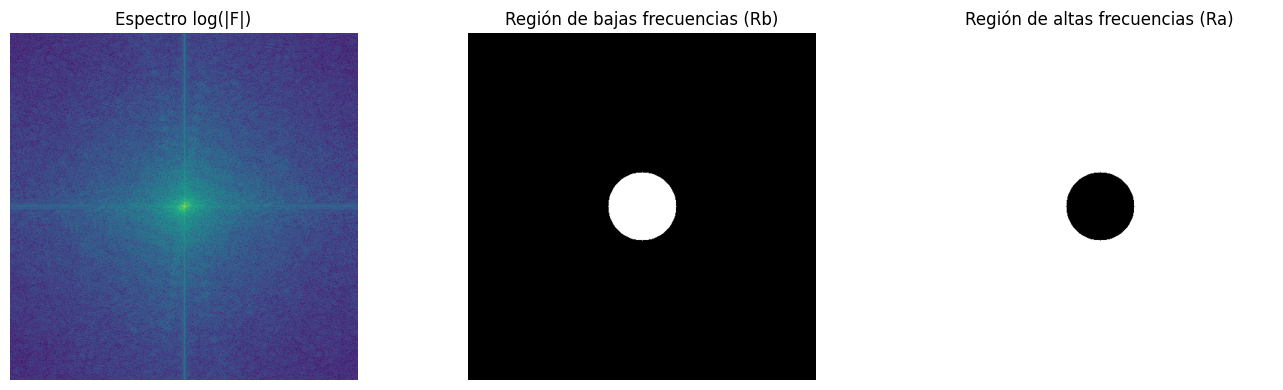

In [11]:
# Construcción de una malla de coordenadas centradas
u = np.arange(-M//2, M//2)
v = np.arange(-N//2, N//2)
U, V = np.meshgrid(u, v, indexing="ij")
R = np.sqrt(U**2 + V**2)

# Radio de separación (ajustable)
r0 = 50  # píxeles en frecuencia

# Máscaras para bajas (Rb) y altas (Ra)
Rb_mask = R <= r0
Ra_mask = R > r0

# Visualización
fig, ax = plt.subplots(1, 3, figsize=(14,4))
ax[0].imshow(np.log1p(S), cmap="viridis")
ax[0].set_title("Espectro log(|F|)")
ax[1].imshow(Rb_mask, cmap="gray")
ax[1].set_title("Región de bajas frecuencias (Rb)")
ax[2].imshow(Ra_mask, cmap="gray")
ax[2].set_title("Región de altas frecuencias (Ra)")
for a in ax: a.axis("off")
plt.tight_layout()
plt.show()


In [12]:
# Energías parciales (integrales dobles discretas)
Eb = np.sum((S**2)[Rb_mask]) / (M*N)
Ea = np.sum((S**2)[Ra_mask]) / (M*N)

E_total = Eb + Ea

print(f"E_b (bajas): {Eb:.6f}")
print(f"E_a (altas): {Ea:.6f}")
print(f"E_total (Eb + Ea): {E_total:.6f}")
print(f"Proporciones: Eb/E = {Eb/E_total:.3f}, Ea/E = {Ea/E_total:.3f}")


E_b (bajas): 73032.237433
E_a (altas): 1071.071806
E_total (Eb + Ea): 74103.309239
Proporciones: Eb/E = 0.986, Ea/E = 0.014


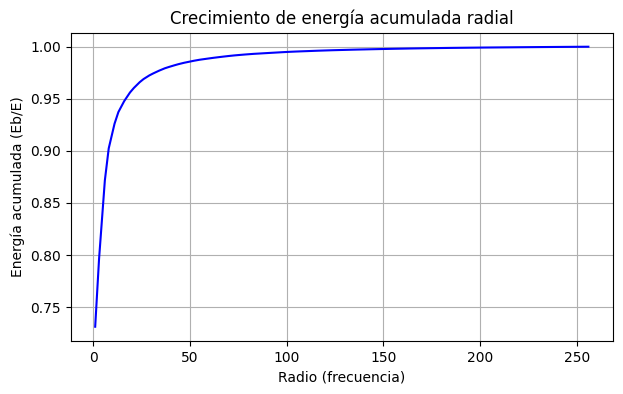

<Figure size 1000x500 with 0 Axes>

In [13]:
# Cálculo de energía acumulada radialmente
r_values = np.linspace(1, min(M, N)//2, 100, dtype=int)
energy_curve = []

for r in r_values:
    mask = R <= r
    E_r = np.sum((S**2)[mask]) / (M*N)
    energy_curve.append(E_r / E_total)

plt.figure(figsize=(7,4))
plt.plot(r_values, energy_curve, 'b-')
plt.xlabel("Radio (frecuencia)")
plt.ylabel("Energía acumulada (Eb/E)")
plt.title("Crecimiento de energía acumulada radial")
plt.grid(True)
plt.show()

plt.savefig("../reports/energia_radial.png")


In [14]:
# Crear archivo de notas en la bitácora
os.makedirs("../diary", exist_ok=True)

with open("../diary/energy_notes.md", "a", encoding="utf-8") as f:
    f.write(f"\n---\nExperimento: Energía espectral (astronaut)\n")
    f.write(f"E_space = {E_space:.6f}, E_freq = {E_freq:.6f}\n")
    f.write(f"Eb = {Eb:.6f}, Ea = {Ea:.6f}, Eb/E = {Eb/E_total:.3f}\n")
    f.write(f"Diferencia Parseval = {(E_space - E_freq)/E_space:.3%}\n")
    f.write(f"Interpretación: La mayor parte de la energía está concentrada en bajas frecuencias.\n")
